### Step 1: Generate Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, single feature
y = 5 * X.squeeze() + np.random.randn(100) * 5  # True function: y = 5X + noise


### Step 2: Train Ridge Regression for Different `alpha` Values

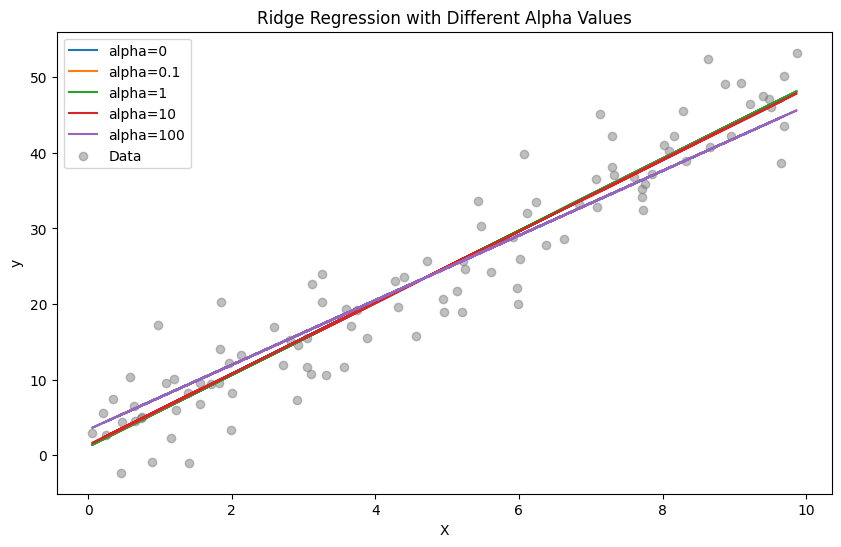

In [2]:
# Train models with different alpha values
alphas = [0, 0.1, 1, 10, 100]  # Different regularization strengths
plt.figure(figsize=(10, 6))

for alpha in alphas:
    ridge = Ridge(alpha=alpha)  # Create Ridge model
    ridge.fit(X, y)  # Train model
    y_pred = ridge.predict(X)  # Predictions

    plt.plot(X, y_pred, label=f"alpha={alpha}")

plt.scatter(X, y, color="gray", alpha=0.5, label="Data")
plt.legend()
plt.title("Ridge Regression with Different Alpha Values")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


✅ Observation:

Small alpha → Model fits data well (risk of overfitting).

Large alpha → Model shrinks coefficients, making predictions smoother (risk of underfitting).

### Step 3: How to Choose `alpha`?

In [3]:
from sklearn.model_selection import GridSearchCV

# Define Ridge model
ridge = Ridge()

# Define possible alpha values
alpha_values = {'alpha': np.logspace(-3, 3, 100)}  # Try values from 0.001 to 1000

# Perform Grid Search with Cross-Validation
ridge_cv = GridSearchCV(ridge, alpha_values, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X, y)

# Best alpha
print(f"Best alpha: {ridge_cv.best_params_['alpha']}")


Best alpha: 2.1544346900318843


# Ridge Regression with Curved Data

### Step 1: Generate Curved Data

We create a quadratic function with noise:

𝑦 = 𝑋^3 − 5𝑋^2 + 𝑋 + noise 

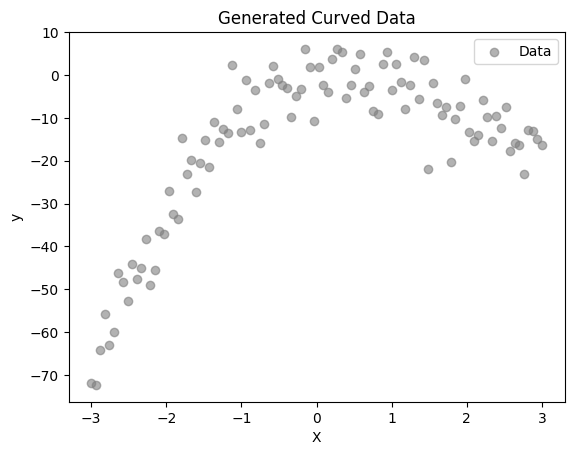

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate nonlinear data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)  # 100 points from -3 to 3
y = X**3 - 5*X**2 + X + np.random.normal(0, 6, X.shape)  # True function + noise

# Plot the original data
plt.scatter(X, y, color="gray", label="Data", alpha=0.6)
plt.title("Generated Curved Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


### Step 2: Fit Ridge Regression with Different `alpha` Values

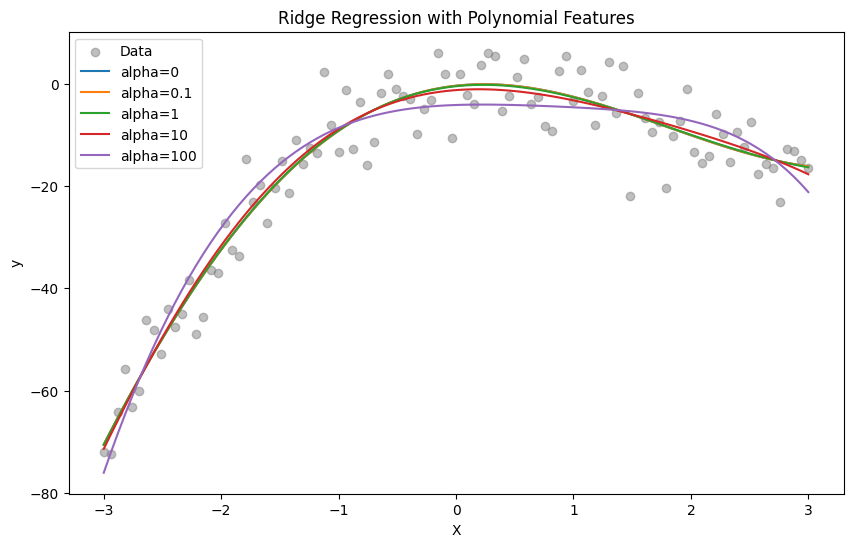

In [9]:
# Define different alpha values
alphas = [0, 0.1, 1, 10, 100]

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="gray", alpha=0.5, label="Data")

for alpha in alphas:
    model = make_pipeline(PolynomialFeatures(degree=5), Ridge(alpha=alpha))  
    model.fit(X, y)
    y_pred = model.predict(X)
    
    plt.plot(X, y_pred, label=f"alpha={alpha}")

plt.title("Ridge Regression with Polynomial Features")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
